In [83]:
%matplotlib inline
import pandas as pd

In [84]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [85]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [86]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [87]:
titles['decade'] = titles.year // 10 * 10
cast['decade'] = cast.year // 10 *10

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

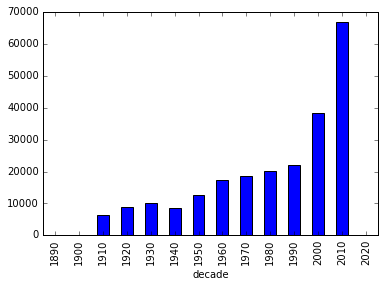

In [88]:
banana = titles.groupby(['decade']).size()
banana.plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

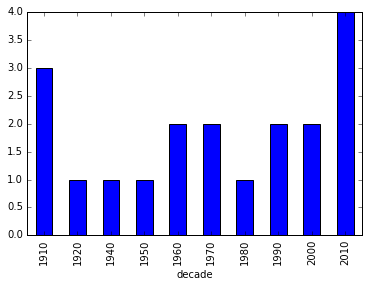

In [89]:
banana = titles[(titles.title == 'Hamlet')]
banana = banana.groupby(['decade']).size()
banana.plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

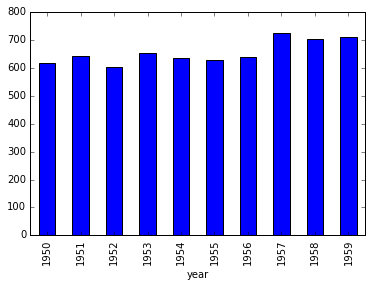

In [90]:
banana = cast[(cast.n == 1) & (cast.type == 'actor') & (cast.decade == 1950)]
banana = banana.groupby(['year']).size()
banana.plot(kind = 'bar')

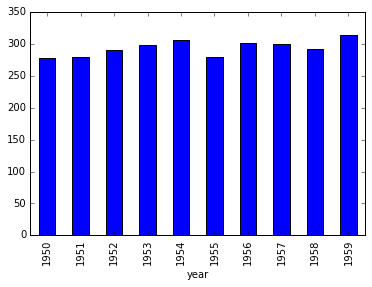

In [91]:
banana = cast[(cast.n == 1) & (cast.type == 'actress') & (cast.decade == 1950)]
banana = banana.groupby(['year']).size()
banana.plot(kind = 'bar')

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [92]:
banana = cast[(cast.decade == 1950) & (cast.type == 'actor')]
banana = banana.groupby(['n']).size()
banana.head(5)

n
1.0    6563
2.0    4530
3.0    5538
4.0    5548
5.0    5568
dtype: int64

In [93]:
banana = cast[(cast.decade == 1950) & (cast.type == 'actress')]
banana = banana.groupby(['n']).size()
banana.head(5)

n
1.0    2940
2.0    4519
3.0    3129
4.0    2828
5.0    2525
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [94]:
banana = cast[(cast.title == 'The Pink Panther')]
banana = banana.groupby(['year']).size()
banana

year
1963    19
2006    89
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [95]:
banana = cast[(cast.name == 'Frank Oz')]
banana = banana.groupby(['title','year']).count().reset_index()
banana = banana[(banana.n>1)]
banana = banana[['title','year','n']]
banana.sort_values('year')

,title,year,n
23,The Muppet Movie,1979,8
0,An American Werewolf in London,1981,2
21,The Great Muppet Caper,1981,6
20,The Dark Crystal,1982,2
24,The Muppets Take Manhattan,1984,7
2,Follow That Bird,1985,3
22,The Muppet Christmas Carol,1992,7
7,Muppet Treasure Island,1996,4
8,Muppets from Space,1999,4
18,The Adventures of Elmo in Grouchland,1999,3


### List each of the characters that Frank Oz has portrayed at least twice.

In [96]:
banana = cast[(cast.name == 'Frank Oz')]
banana = banana.groupby(['character']).size()
df = pd.Series(data = banana).reset_index('character')
df.columns = ['character','num']
banana = df[(df.num>=2)]
banana

,character,num
0,Animal,6
2,Bert,3
5,Cookie Monster,3
10,Fozzie Bear,4
15,Grover,2
18,Miss Piggy,6
25,Sam the Eagle,5
34,Yoda,7
